# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** MUHAMMAD NAUFAL
- **Email:** naufalassalam@gmail.com
- **ID Dicoding:** MUHAMMAD NAUFAL

## Menentukan Pertanyaan Bisnis

- Pada musim dan bulan apa saja penyewaan sepeda meningkat?
- Mengapa tingkat sewa sepeda pada musim tersebut tinggi?
- Apa yang harus dilakukan untuk menghindari kehabis unit pada musim tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Karena feature instant hanya berisikan id data maka feature tersebut dapat dibuang menggunakan fungsi drop

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# mengubah tipe data dteday menjadi datetime
df.dteday = pd.to_datetime(df.dteday)
df.set_index('dteday', inplace = True)

In [5]:
# check missing values
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# check duplicate data
df.duplicated().sum()

0

In [7]:
df.describe().round(4)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,366.0000,2.4966,0.5007,6.5198,0.0287,2.9973,0.6840,1.3953,0.4954,0.4744,0.6279,0.1905,848.1765,3656.1724,4504.3488
std,211.1658,1.1108,0.5003,3.4519,0.1672,2.0048,0.4652,0.5449,0.1831,0.1630,0.1424,0.0775,686.6225,1560.2564,1937.2115
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0591,0.0791,0.0000,0.0224,2.0000,20.0000,22.0000
25%,183.5000,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,0.3371,0.3378,0.5200,0.1349,315.5000,2497.0000,3152.0000
50%,366.0000,3.0000,1.0000,7.0000,0.0000,3.0000,1.0000,1.0000,0.4983,0.4867,0.6267,0.1810,713.0000,3662.0000,4548.0000
75%,548.5000,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,0.6554,0.6086,0.7302,0.2332,1096.0000,4776.5000,5956.0000
max,731.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,0.8617,0.8409,0.9725,0.5075,3410.0000,6946.0000,8714.0000


In [8]:
# check incorrect values
print(f'Maximum temp in celcius \t: {(df.temp.max()*41).round()}')
print(f'Maximum atemp in celcius \t: {(df.atemp.max()*50).round()}')
print(f'Maximum windspeed \t\t: {(df.hum.max()*67).round()}')
print(f'Maximum hum \t\t\t: {(df.hum.max()*100).round()}')

Maximum temp in celcius 	: 35.0
Maximum atemp in celcius 	: 42.0
Maximum windspeed 		: 65.0
Maximum hum 			: 97.0


### Cleaning Data

In [9]:
# Menghapus feature yang tidak digunakan
df = df.drop(columns = 'instant', axis = 1)

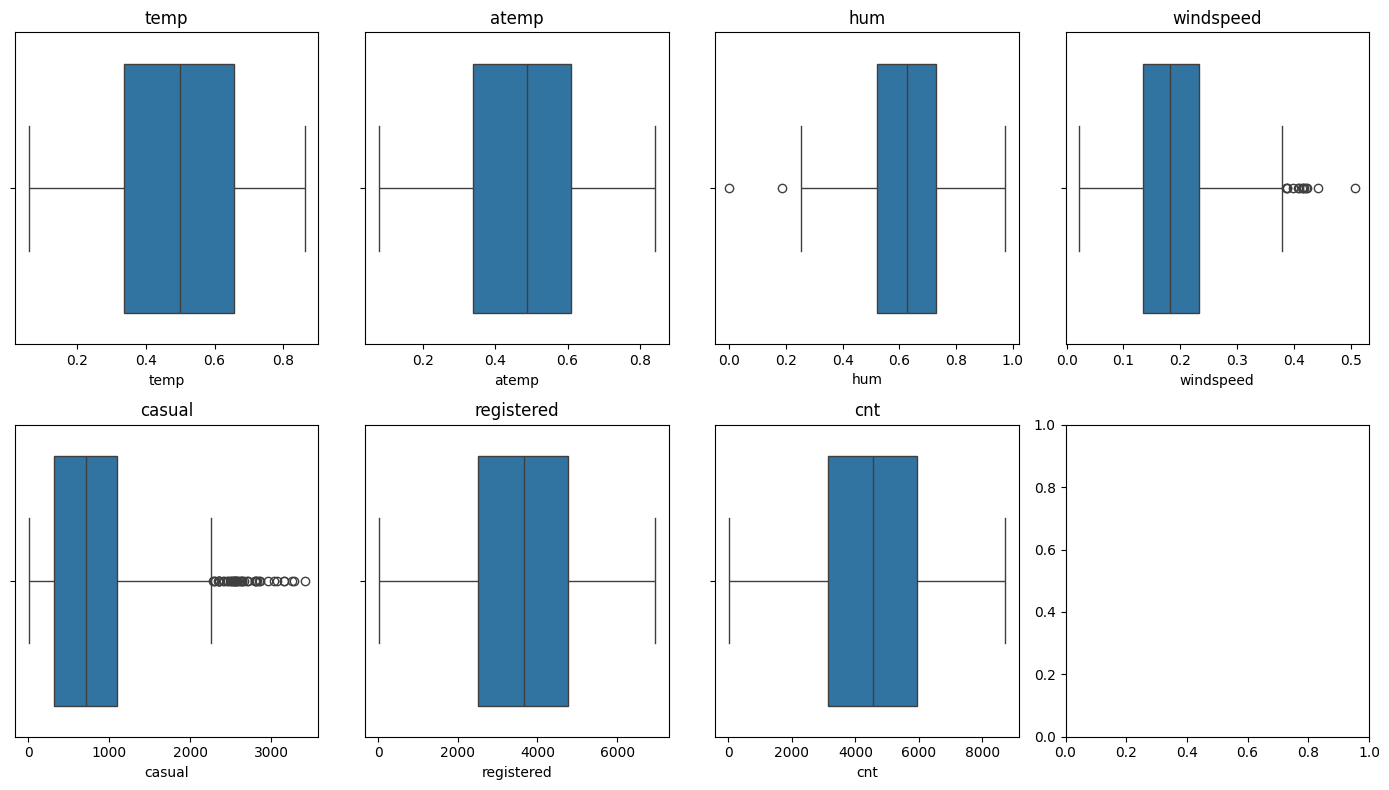

In [10]:
# Detect outliers
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
for i, feature in enumerate(df[numerical_columns]):
    r = i // 4
    c = i % 4
    sns.boxplot(data=df, x=feature, ax=axes[r, c])
    axes[r, c].set_title(feature)

plt.tight_layout()
plt.show()

Temuan : terdapat outlier pada feature windspeed dan casual

In [11]:
# cleaning data menggunakan IQR
Q1 = (df['windspeed']).quantile(0.25)
Q3 = (df['windspeed']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

lower_windspeed = df['windspeed'] < minimum
upper_windspeed = df['windspeed'] > maximum

Q1 = (df['casual']).quantile(0.25)
Q3 = (df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

lower_casual = df['casual'] < minimum
upper_casual = df['casual'] > maximum
new_df = df.copy()

new_df.drop(df[lower_casual].index, inplace=True)
new_df.drop(df[upper_casual].index, inplace=True)
new_df.drop(df[lower_windspeed].index, inplace=True)
new_df.drop(df[upper_windspeed].index, inplace=True)

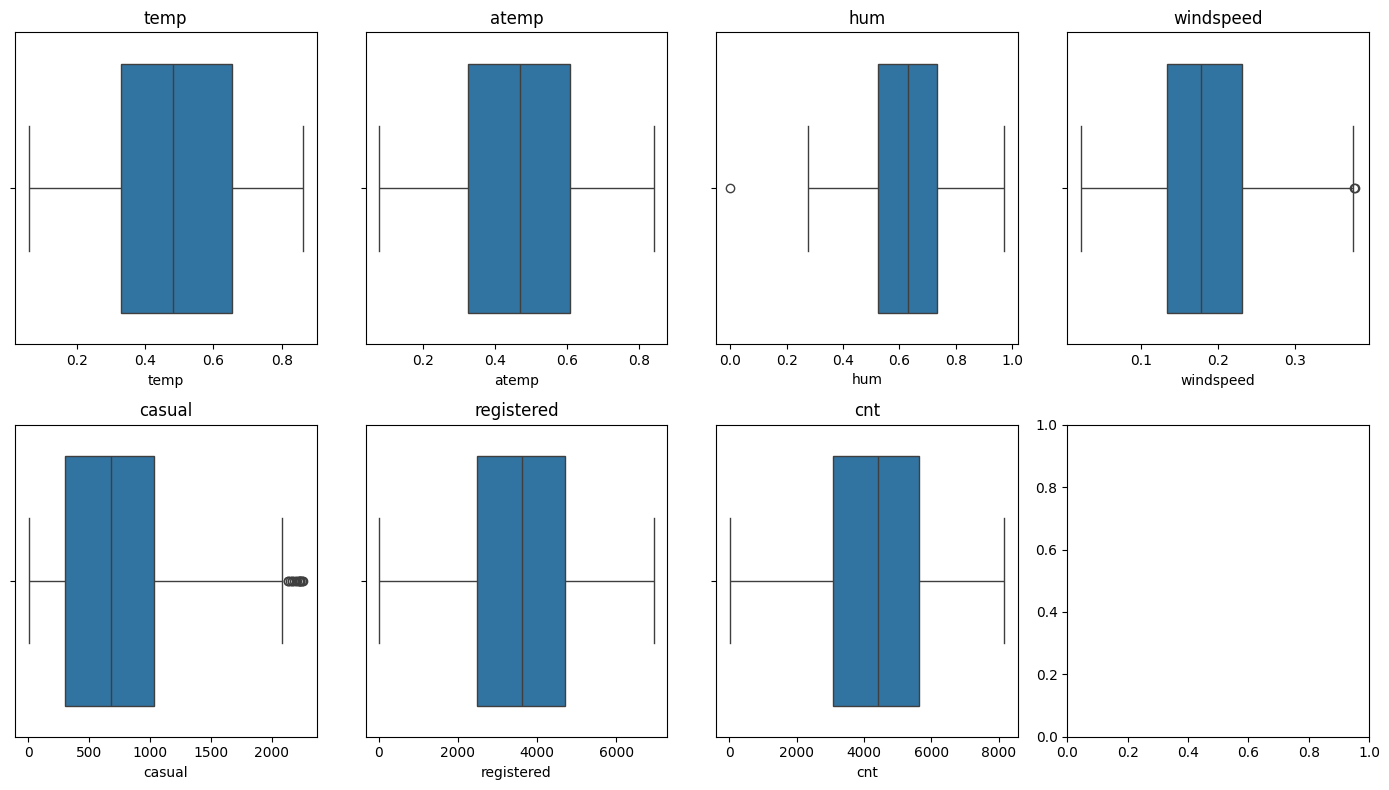

In [12]:
# setelah menerapkan IQR
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
for i, feature in enumerate(new_df[numerical_columns]):
    r = i // 4
    c = i % 4
    sns.boxplot(data=new_df, x=feature, ax=axes[r, c])
    axes[r, c].set_title(feature)

plt.tight_layout()
plt.show()

In [13]:
print(f'total data sebelum IQR = {len(df)}')
print(f'total data sesudah IQR = {len(new_df)}')

total data sebelum IQR = 731
total data sesudah IQR = 674


## Exploratory Data Analysis (EDA)

In [14]:
new_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [15]:
# check unique value categorical feature
for i in new_df[categorical_columns]:
    print(f'unique value pada {i} : {len(new_df[i].unique())}')

unique value pada season : 4
unique value pada yr : 2
unique value pada mnth : 12
unique value pada holiday : 2
unique value pada weekday : 7
unique value pada workingday : 2
unique value pada weathersit : 3


In [16]:
# check unique value numerical feature
for i in new_df[numerical_columns]:
    print(f'unique value pada {i} : {len(new_df[i].unique())}')

unique value pada temp : 479
unique value pada atemp : 638
unique value pada hum : 561
unique value pada windspeed : 602
unique value pada casual : 557
unique value pada registered : 631
unique value pada cnt : 647


## Univariate Analysis

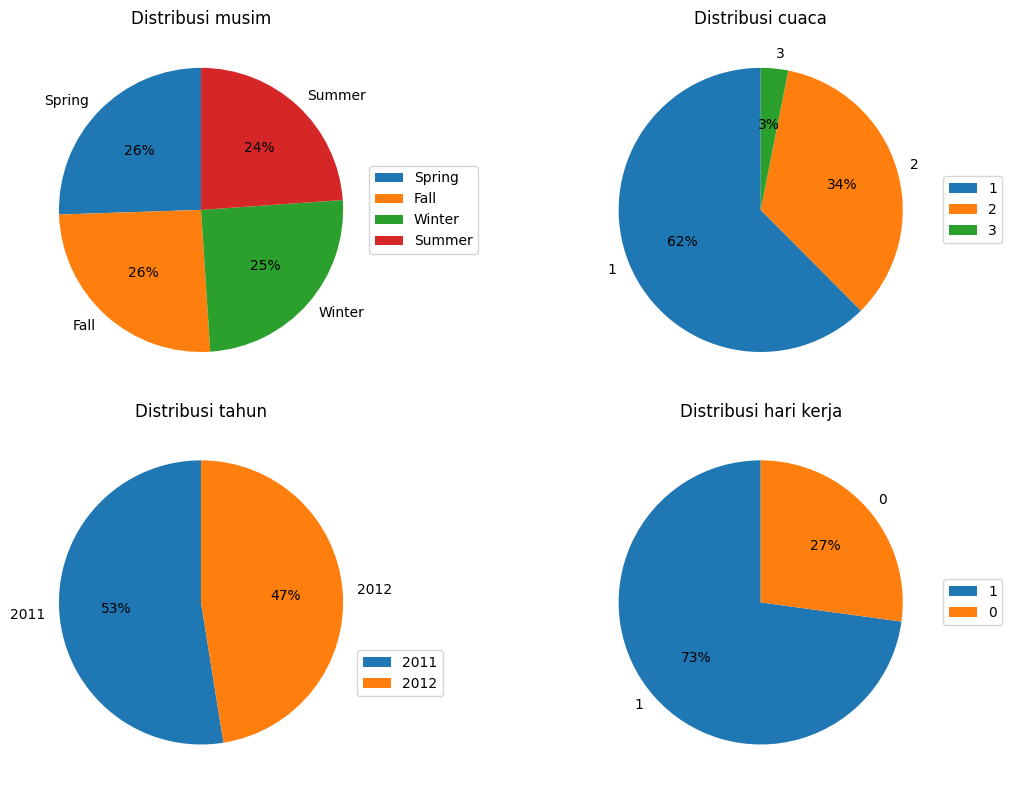

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

uni_season = new_df[categorical_columns].season.value_counts().reset_index()
uni_season = uni_season.replace({'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}})
axs[0, 0].pie(x = uni_season['count'], labels= uni_season.season, autopct='%1.0f%%', startangle=90)
axs[0, 0].set_title('Distribusi musim')
axs[0, 0].legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5))

uni_weathersit = new_df[categorical_columns].weathersit.value_counts().reset_index()
axs[0, 1].pie(x = uni_weathersit['count'], labels = uni_weathersit.weathersit, autopct='%1.0f%%', startangle=90)
axs[0, 1].set_title('Distribusi cuaca')
axs[0, 1].legend(loc = 'center right', bbox_to_anchor=(1.2, 0.5))

uni_yr = new_df[categorical_columns].yr.value_counts().reset_index()
uni_yr = uni_yr.replace({'yr': {0: 2011, 1: 2012}})
axs[1, 0].pie(x = uni_yr['count'], labels= uni_yr.yr, autopct='%1.0f%%', startangle=90)
axs[1, 0].set_title('Distribusi tahun')
axs[1, 0].legend(loc = 'center right', bbox_to_anchor=(1.2, 0.3))

uni_workday = new_df[categorical_columns].workingday.value_counts().reset_index()
axs[1, 1].pie(x = uni_workday['count'], labels= uni_workday.workingday, autopct='%1.0f%%', startangle=90)
axs[1, 1].set_title('Distribusi hari kerja')
axs[1, 1].legend(loc = 'center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()

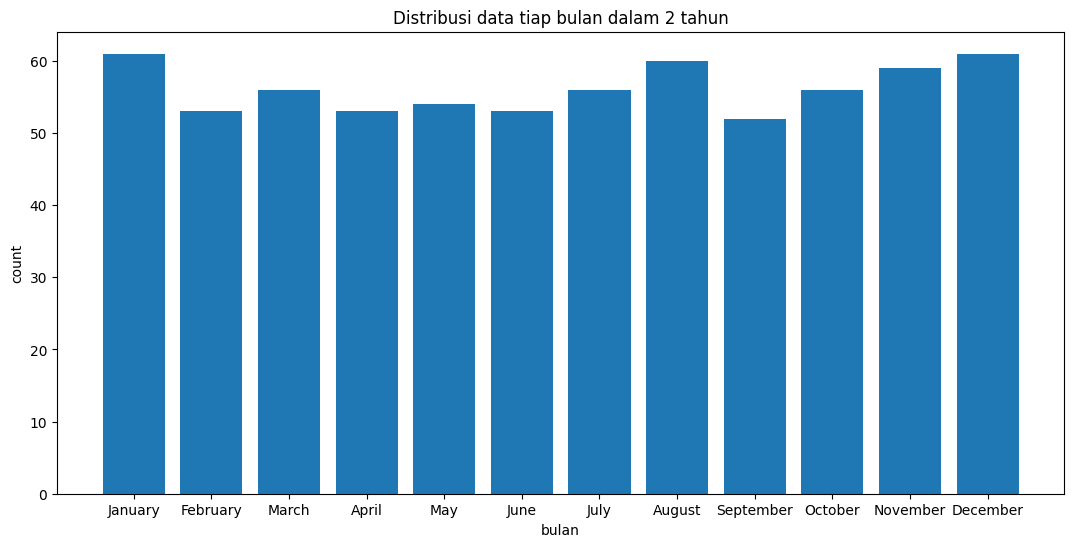

In [18]:
uni_mnth = new_df[categorical_columns].mnth.value_counts().reset_index().sort_values('mnth')
uni_mnth = uni_mnth.replace({'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}})

plt.figure(figsize = (13,6))
plt.bar(uni_mnth.mnth, uni_mnth['count'])
plt.title('Distribusi data tiap bulan dalam 2 tahun')
plt.xlabel('bulan')
plt.ylabel('count')
plt.show()

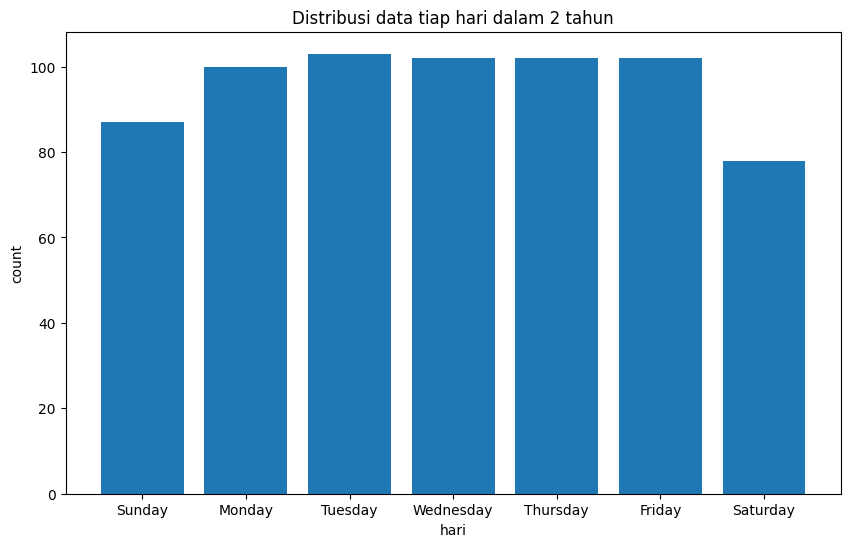

In [19]:
uni_days = new_df[categorical_columns].weekday.value_counts().reset_index().sort_values('weekday')
uni_days = uni_days.replace({'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}})
plt.figure(figsize = (10,6))
plt.bar(uni_days.weekday, uni_days['count'])
plt.title('Distribusi data tiap hari dalam 2 tahun')
plt.xlabel('hari')
plt.ylabel('count')
plt.show()

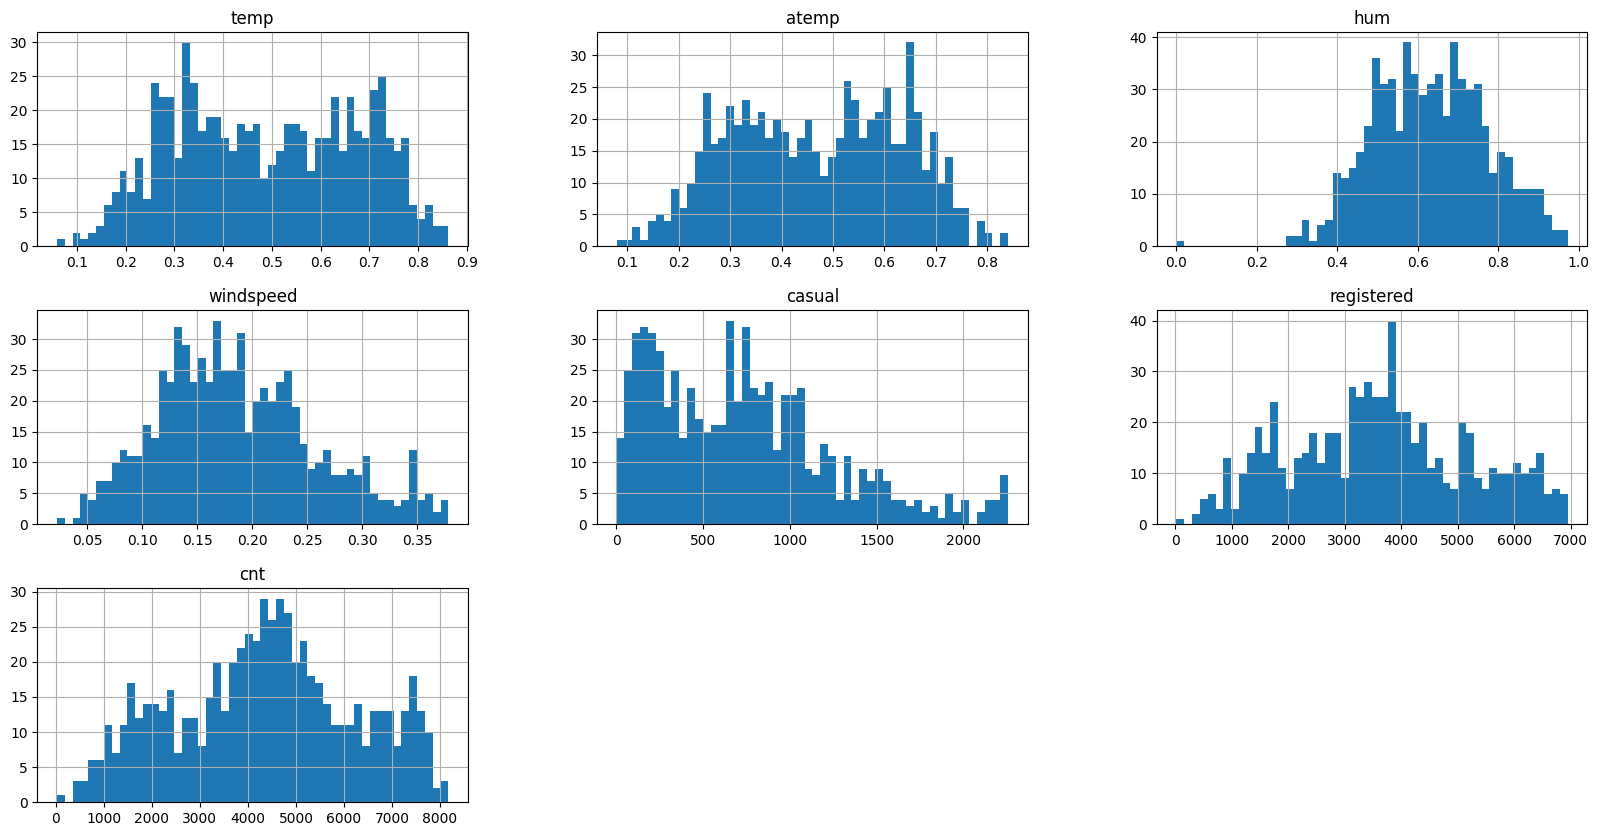

In [20]:
new_df[numerical_columns].hist(bins=50, figsize=(20,10))
plt.show()

## Bivariate Analysis

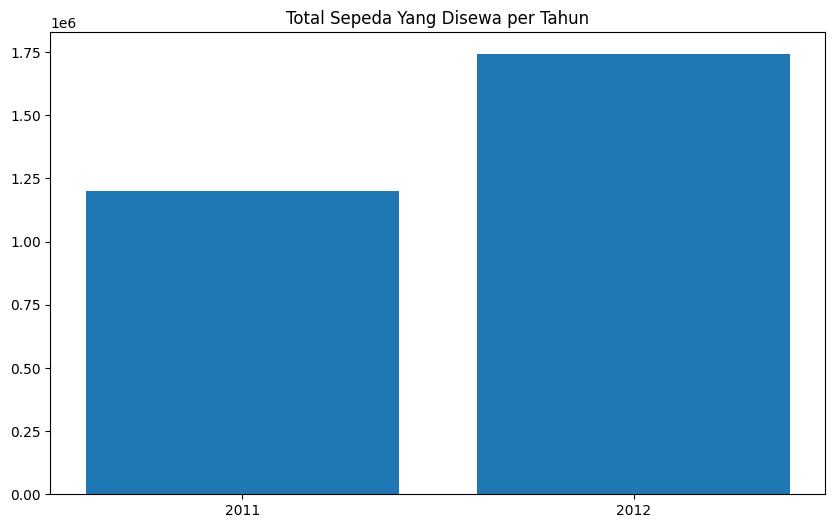

In [21]:
sample_year = new_df.groupby('yr').sum().reset_index()

plt.figure(figsize = (10,6))
plt.bar(sample_year.yr, sample_year.cnt)
plt.title('Total Sepeda Yang Disewa per Tahun')
plt.xticks(sample_year.yr, [2011, 2012])
plt.show()

Pada tahun 2012 tingkat sewa unit sepeda lebih banyak daripada tahun 2011

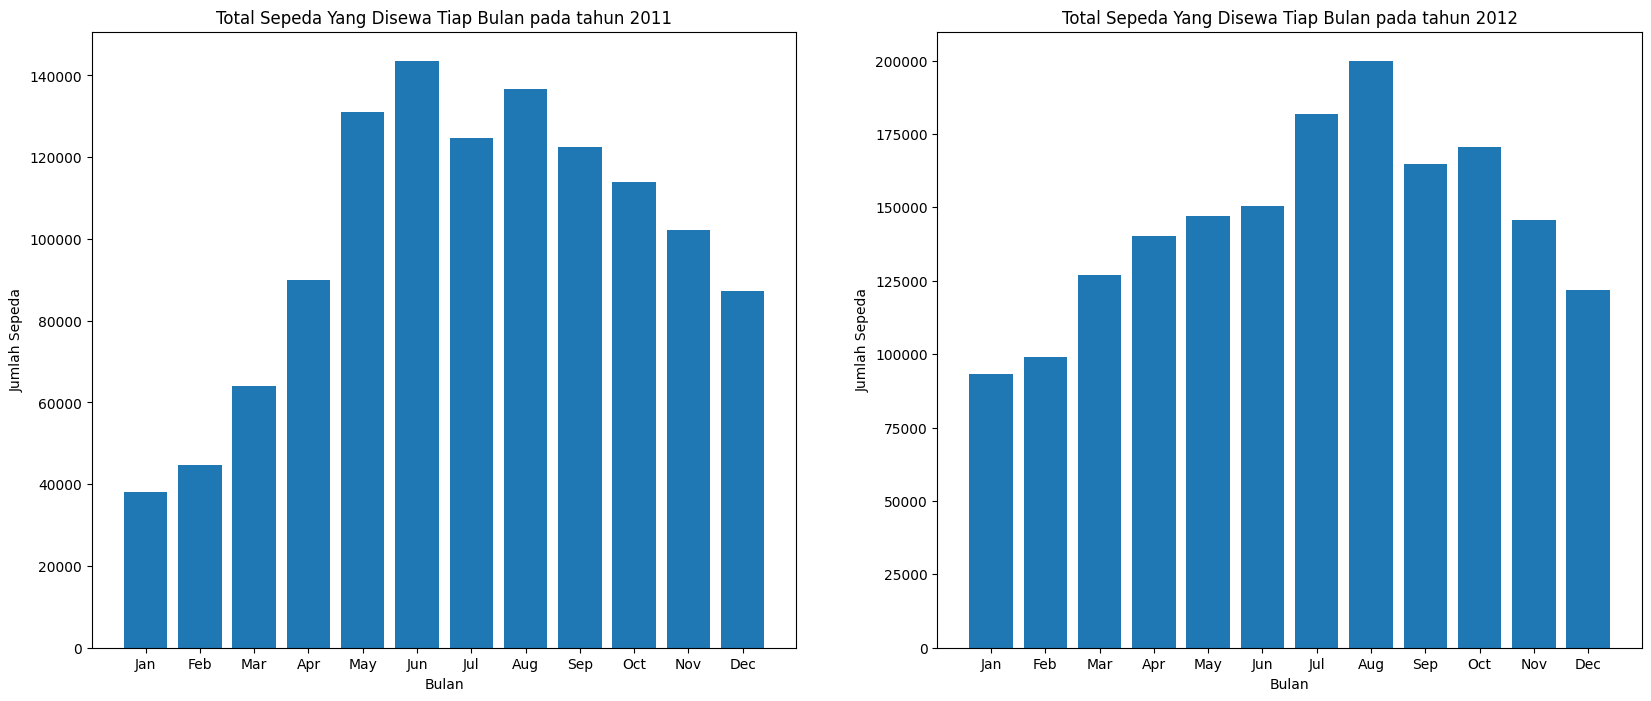

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sample1 = new_df.loc[new_df.yr == 0].groupby('mnth').sum().reset_index().sort_values('mnth')
sample2 = new_df.loc[new_df.yr == 1].groupby('mnth').sum().reset_index().sort_values('mnth')

axs[0].bar(sample1.mnth, sample1.cnt)
axs[0].set_title('Total Sepeda Yang Disewa Tiap Bulan pada tahun 2011')
axs[0].set_xlabel('Bulan')
axs[0].set_ylabel('Jumlah Sepeda')
axs[0].set_xticks(sample1.mnth, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

axs[1].bar(sample2.mnth, sample2.cnt)
axs[1].set_title('Total Sepeda Yang Disewa Tiap Bulan pada tahun 2012')
axs[1].set_xlabel('Bulan')
axs[1].set_ylabel('Jumlah Sepeda')
axs[1].set_xticks(sample2.mnth, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

Terlihat pada bulan januari, febuari dan maret jumlah penyewaan sepeda relatif sedikit dibandingkan bulan-bulan lainnya, dan dari pola grafik diatas dapat dilihat bahwa data memiliki pola musiman.

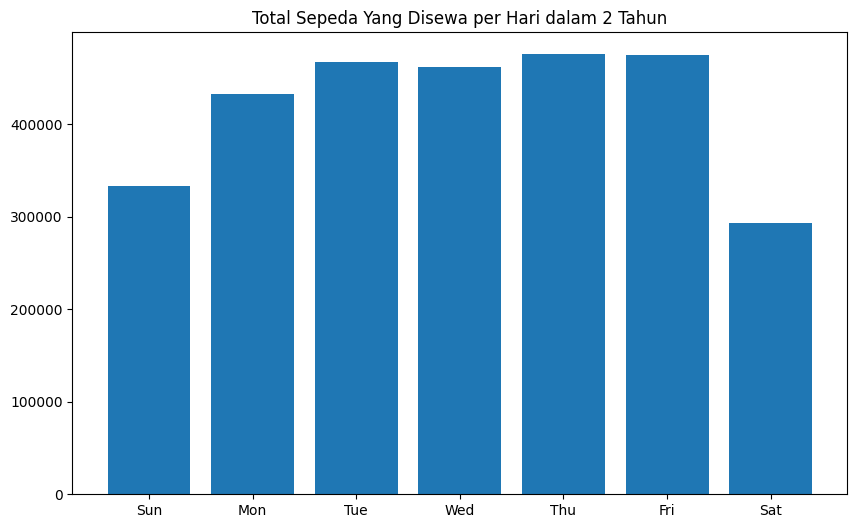

In [23]:
day = new_df.groupby('weekday').sum()['cnt'].reset_index()

plt.figure(figsize = (10,6))
plt.bar(day.weekday, day.cnt)
plt.title('Total Sepeda Yang Disewa per Hari dalam 2 Tahun')
plt.xticks(day.weekday, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

Hasil dari visualisasi diatas menunjukkan bahwa orang cenderung menyewa sepeda pada hari kerja daripada hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada musim dan bulan apa penyewaan unit sepeda meningkat?

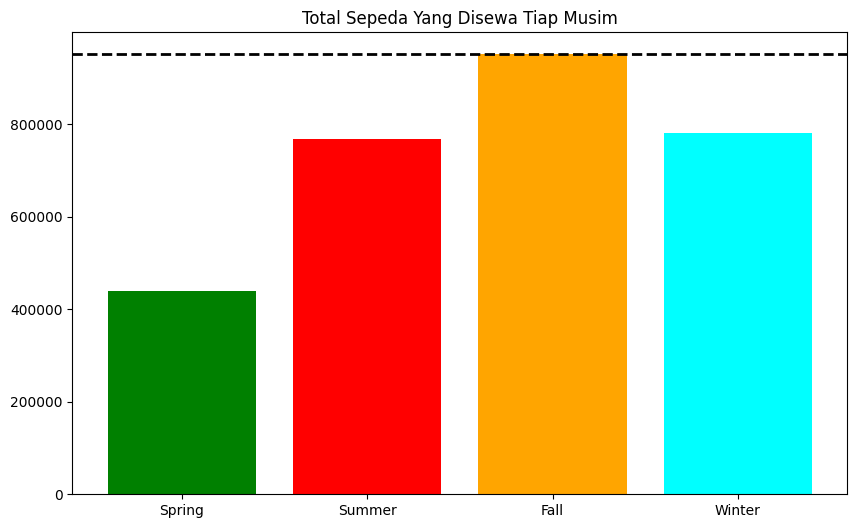

In [24]:
season = new_df.groupby('season').sum()
colors = ['green', 'red', 'orange', 'cyan']
max_value = max(season.cnt)

plt.figure(figsize = (10,6))
plt.bar(season.index, season.cnt, color = colors)
plt.title('Total Sepeda Yang Disewa Tiap Musim')
plt.xticks(season.index, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.axhline(max_value, color='black', linestyle='dashed', linewidth=2)
plt.show()

Dapat dilihat musim gugur memiliki nilai yang paling tinggi, dimana pada musim tersebut banyak orang yang menyewa sepeda baik dari casual user ataupun registered user.

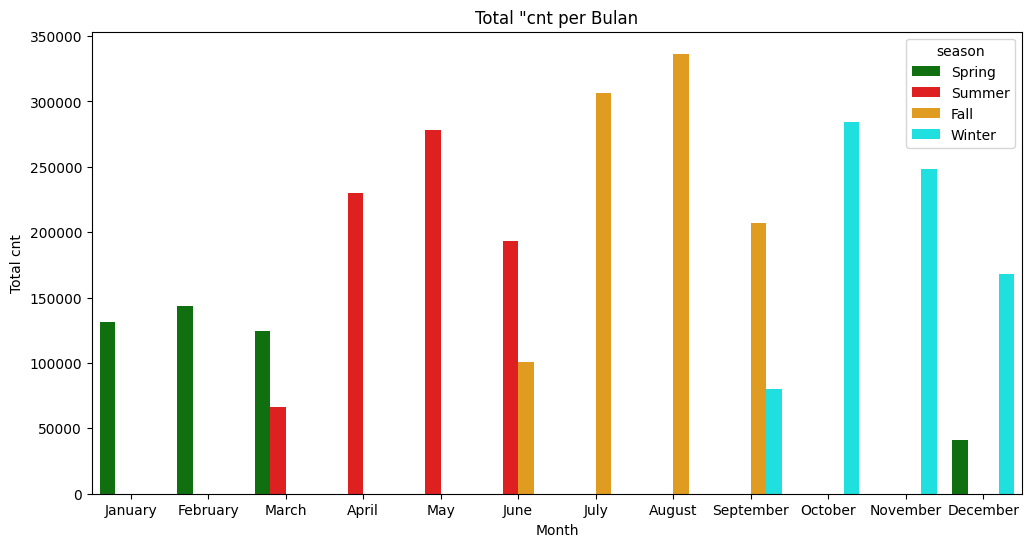

In [25]:
colors = ['green', 'red', 'orange', 'cyan']
monthly_cnt = new_df.groupby(['mnth', 'season']).sum().reset_index()
monthly_cnt = monthly_cnt.replace({'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}})
monthly_cnt = monthly_cnt.replace({'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}})

plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', hue='season', data=monthly_cnt, palette=colors)
plt.title('Total "cnt per Bulan')
plt.xlabel('Month')
plt.ylabel('Total cnt')
plt.show()

Dari grafik diatas menunjukkan bahwa musim gugur dimulai dari pertengahan bulan mei sampai pertengahan bulan agustus dan peningkatan sewa sepeda terjadi pada bulan juni dan juli.

### Pertanyaan 2:

Mengapa pada musim gugur tingkat sewa sepeda lebih tinggi dari bulan lainnya

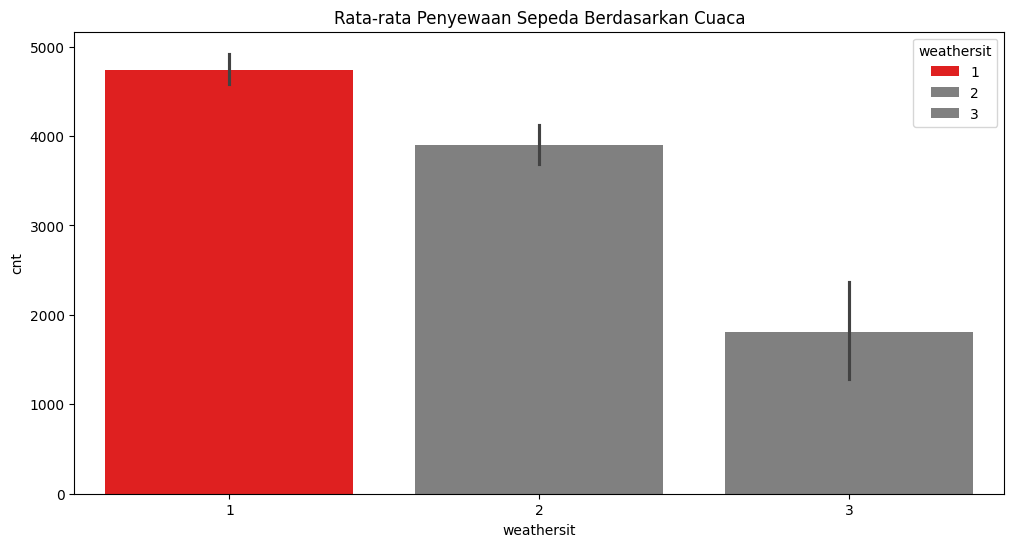

In [26]:
plt.figure(figsize=(12, 6))
colors = ['red', 'gray', 'gray']
sns.barplot(x = 'weathersit', y = 'cnt', hue = 'weathersit', data = new_df, palette = colors)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.show()

**Note** :

- 1: Clear, Few clouds, Partly cloudy,
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Berdasarkan cuacanya, rata-rata orang menyewa sepeda ketika kondisi cuacanya cerah, sedikit berawan, atau berawan

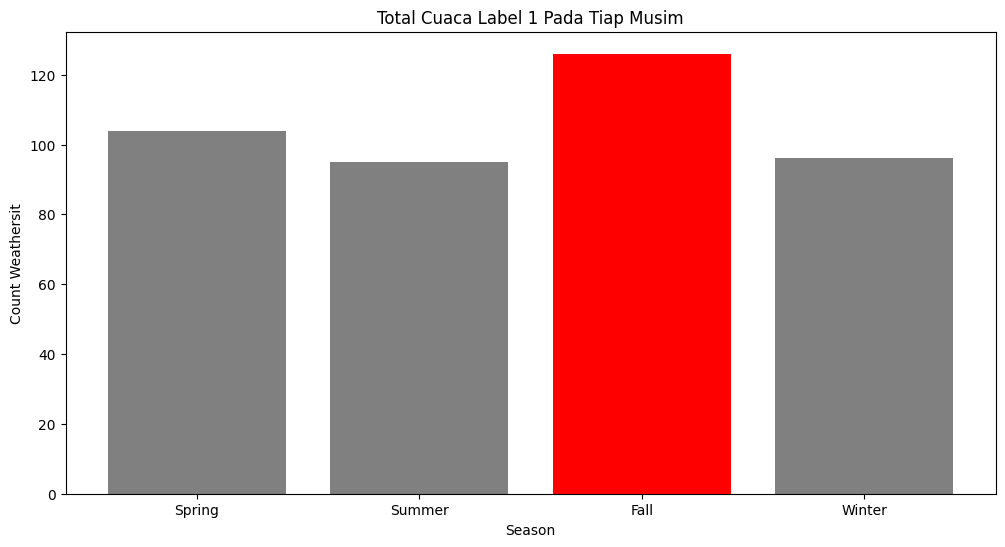

In [27]:
weathersit_count = new_df.pivot_table(index='season', columns='weathersit', aggfunc='size', fill_value=0)
colors = ['gray', 'gray', 'red', 'gray']

plt.figure(figsize=(12, 6))
plt.bar(weathersit_count.index, weathersit_count[1], color = colors)
plt.xlabel('Season')
plt.xticks(weathersit_count.index, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylabel('Count Weathersit')
plt.title('Total Cuaca Label 1 Pada Tiap Musim')
plt.show()

Kondisi cuaca seperti cerah, sedikit berawan dan berawan lebih sering terjadi pada musim gugur

## Conclusion

- Q1 : Penyewaan sepeda paling banyak terjadi pada musim gugur. Dimana musim ini dimulai dari pertengahan bulan Mei hingga pertengahan bulan Agustus. Peningkatan penyewaan sepeda terjadi pada bulan juni dan juli, kemudian penurunan dimulai pada pertengahan agustus.

- Q2 : Berdasarkan kondisi cuacanya, musim gugur memiliki kondisi cuaca yang sangat cocok untuk melakukan aktifitas diluar rumah seperti bersepeda. Hal ini diperkuat dari hasil yang didapatkan bahwa cuaca cerah, sedikit berawan, dan berawan sering terjadi pada musim gugur daripada musim lainnya.

- Q3 : Untuk menghindari kerugian karena kebanyakan sepeda atau kekurangan sepeda pada tempat penyewaan, sebaiknya tempat pennyewaan sepeda menambahkan sepeda lebih banyak ketika memasuki bulan mei dan mengurangi sepeda pada bulan agustus akhir

In [28]:
new_df.to_csv('data.csv')